 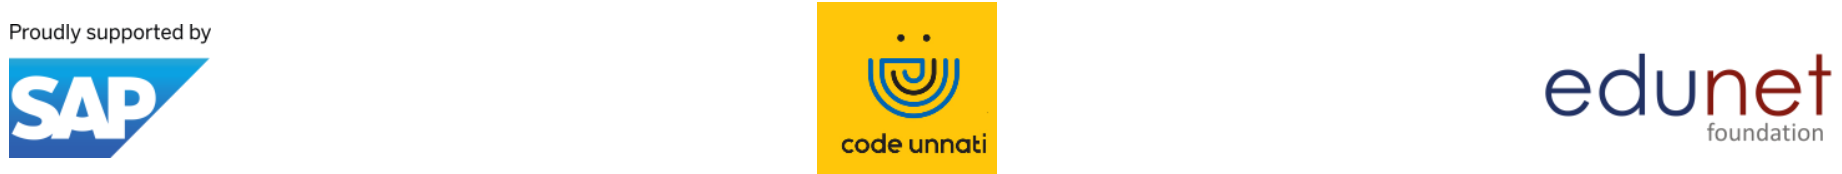

# EDUNET FOUNDATION-Classroom Exercise Notebook

# Lab 3 BFS, DFS & Dijkastra's Algorithm

# What is BFS?

### BFS, Breadth-First Search, is a vertex-based technique for finding the shortest path in the graph. It uses a Queue data structure that follows first in first out. In BFS, one vertex is selected at a time when it is visited and marked then its adjacent are visited and stored in the queue. It is slower than DFS. 

![GIF Example](https://miro.medium.com/v2/resize:fit:786/format:webp/1*GT9oSo0agIeIj6nTg3jFEA.gif)


## BFS Algorithm

### 1. Initialization
- Create an empty queue for nodes to visit.
- Create an empty set for visited nodes.
- Enqueue the starting node and mark it as visited.

### 2. BFS Traversal
- While the queue is not empty:
  - Dequeue a node (current node) from the front of the queue.
  - Visit the current node.
  - Explore unvisited neighbors of the current node:
    - If a neighbor is unvisited:
      - Enqueue it and mark it as visited.

### 3. Continue Until Queue is Empty
- Repeat the traversal process until the queue becomes empty.

### 4. Termination
- When the queue is empty, traversal is complete.

### 5. Output
- Output any desired information associated with each visited node.

### 6. Complexity Analysis
- Time Complexity: O(V + E), where V is the number of vertices and E is the number of edges.
- Space Complexity: O(V + E), where V is the number of vertices and E is the number of edges.


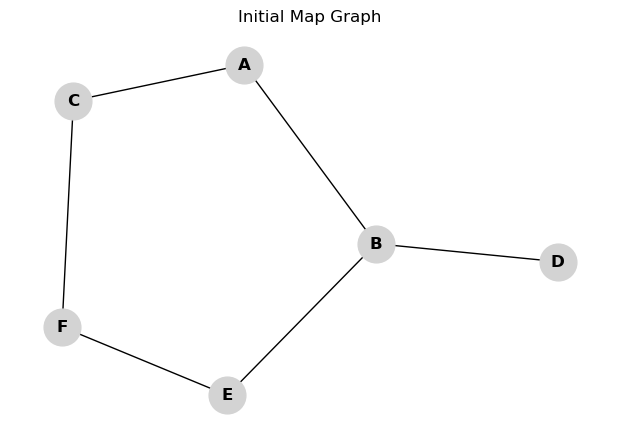


Step 1:
Visiting Node: A
Path: ['A']


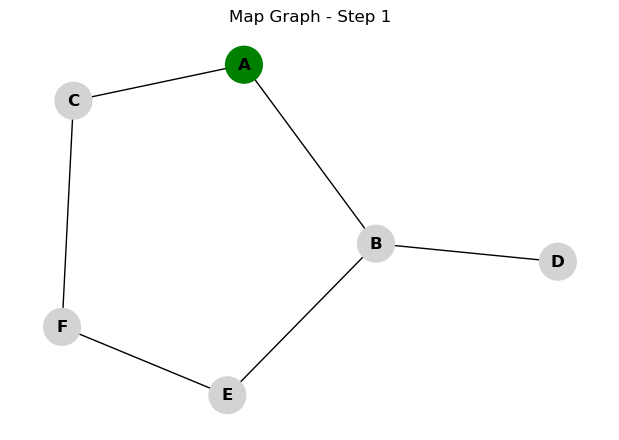

  Enqueueing Neighbor: B
  Enqueueing Neighbor: C

Step 2:
Visiting Node: B
Path: ['A', 'B']


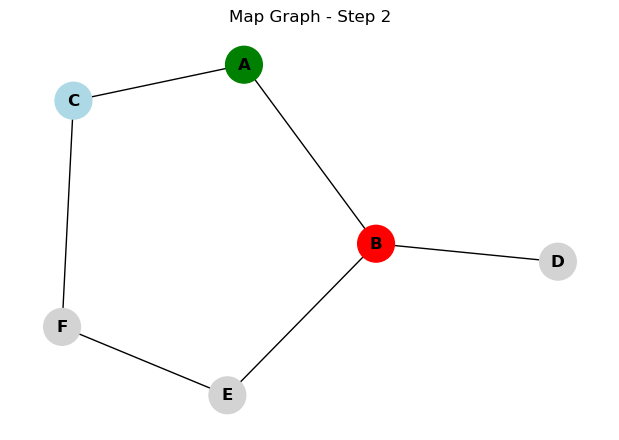

  Enqueueing Neighbor: D
  Enqueueing Neighbor: E

Step 3:
Visiting Node: C
Path: ['A', 'C']


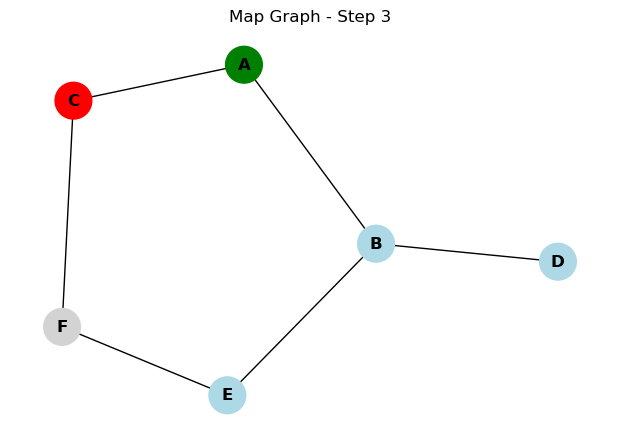

  Enqueueing Neighbor: F

Step 4:
Visiting Node: D
Path: ['A', 'B', 'D']


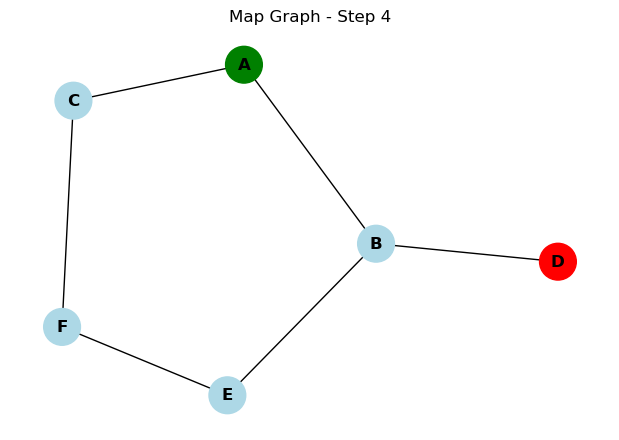


Step 5:
Visiting Node: E
Path: ['A', 'B', 'E']


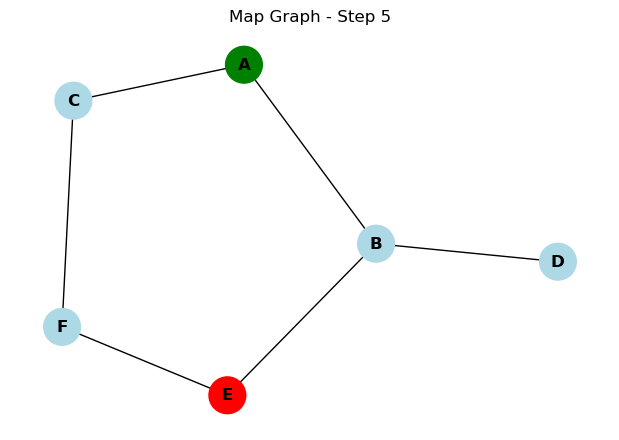


Step 6:
Visiting Node: F
Path: ['A', 'C', 'F']


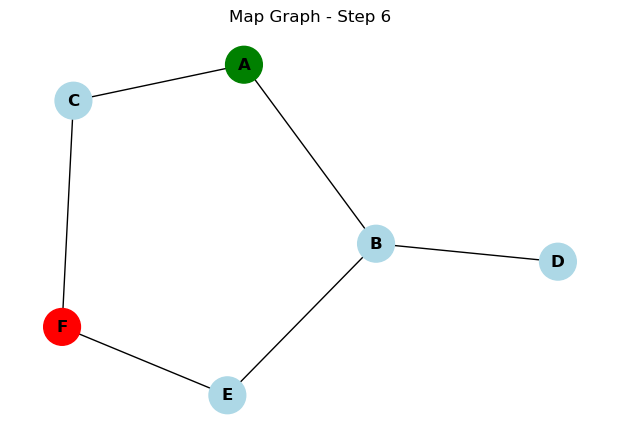

Goal reached!

Shortest Path: ['A', 'C', 'F']


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def bfs_shortest_path(graph, start, goal):
    # Create a directed graph
    G = nx.Graph()
    
    # Add nodes from the keys of the graph dictionary
    G.add_nodes_from(graph.keys())
    
    # Add edges from the values of the graph dictionary
    for node, edges in graph.items():
        for edge in edges:
            G.add_edge(node, edge)
    
    # Plot the initial graph
    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightgray", font_size=12, font_weight="bold", arrowsize=20)
    plt.title("Initial Map Graph")
    plt.show()

    # Step 1: Initialization
    queue = deque([(start, [start])])  # Initialize a queue with the starting city and its path
    visited = set([start])  # Initialize a set to keep track of visited cities
    
    step = 1
    
    # Step 2: BFS Traversal
    while queue:
        current_city, path = queue.popleft()  # Dequeue a city and its path
        print(f"\nStep {step}:")
        print("Visiting Node:", current_city)
        print("Path:", path)
        
        # Update node colors for visualization
        node_colors = []
        for node in G.nodes():
            if node == start:
                node_colors.append("green")  # Starting node is green
            elif node == current_city:
                node_colors.append("red")  # Selected node is red
            elif node in visited:
                node_colors.append("lightblue")  # Visited nodes are light blue
            else:
                node_colors.append("lightgray")  # Unvisited nodes are light gray
        
        # Plot the graph with updated node colors
        plt.figure(figsize=(6, 4))
        nx.draw(G, pos, with_labels=True, node_size=700, node_color=node_colors, font_size=12, font_weight="bold", arrowsize=20)
        plt.title(f"Map Graph - Step {step}")
        plt.show()
        
        if current_city == goal:
            print("Goal reached!")
            return path  # If the current city is the goal, return the path
        
        # Explore unvisited neighbors of the current city
        for neighbor in graph[current_city]:
            if neighbor not in visited:
                # Step 3: Continue Until Queue is Empty
                print("  Enqueueing Neighbor:", neighbor)
                visited.add(neighbor)
                queue.append((neighbor, path + [neighbor]))
        
        step += 1
    
    # Step 4: Termination (if the goal is unreachable)
    print("Goal is unreachable.")
    return "Path not found!"

# Example usage
map_graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

start_city = 'A'
goal_city = 'F'
shortest_path = bfs_shortest_path(map_graph, start_city, goal_city)

# Output the shortest path
print("\nShortest Path:", shortest_path)


## Applications of BFS

1. **Shortest Path & Minimum Ranging**: Tree for Unweighted Graph The least one in an unweighted graph is the route with the fewest edges. We usually reach a node from a source node using the fewest amounts of edges when utilizing Breadth-First. Peer-to-Peer (P2P) Networks BFS is often used to discover all neighbor vertices in peer-to-peer networking like BitTorrent.

2. **Crawlers in Search Engines**: Crawlers create indexes by going from breadth to depth. The goal is to start at the root page and explore all of the links from there.

3. **Websites for Social Networking**: We can use Breadth First Search to identify persons within a particular length 'm' from a member in social connections up to 'm' levels.

4. **All nearby sites are found using Breadth First Search in GPS navigation devices**.

5. **A broadcasted packet uses the Breadth-First Search algorithm to hit all nodes in networking**.

6. **In garbage assemblage, Cheney's technique is used to duplicate trash compilation using Breadth-First Search**.

7. **Cycle identification in undirected networks can be accomplished via Breadth-First Search or DFS (Depth First Search)**. Cycles in directed networks can also be found using BFS.

8. **Algorithm Ford-Fulkerson**: To determine the optimal stream in the Ford-Fulkerson method, we can utilize either Breadth-First or Depth First Traversal. It is preferable to use Breadth-First Traversal since it decreases the worst-case time complexity to O (VE2).Discovering Our Way to see if there is a route connecting two nodes, we can utilize either Breadth-First or Depth First Traversal.


# What is DFS?

### DFS, Depth First Search, is an edge-based technique. It uses the Stack data structure and performs two stages, first visited vertices are pushed into the stack, and second if there are no vertices then visited vertices are popped.  

---
# Depth-First Search (DFS) Algorithm

1. **Initialization**
   - Create an empty stack for nodes to visit.
   - Create an empty set for visited nodes.
   - Push the starting node onto the stack and mark it as visited.

2. **DFS Traversal**
   - While the stack is not empty:
     - Pop a node (current node) from the top of the stack.
     - Visit the current node.
     - Explore unvisited neighbors of the current node:
       - If a neighbor is unvisited:
         - Push it onto the stack and mark it as visited.

3. **Continue Until Stack is Empty**
   - Repeat the traversal process until the stack becomes empty.

4. **Termination**
   - When the stack is empty, traversal is complete.

5. **Output**
   - Output any desired information associated with each visited node.

6. **Complexity Analysis**
   - Time Complexity: O(V + E), where V is the number of vertices and E is the number of edges.
   - Space Complexity: O(V), where V is the number of vertices.

--- 


DFS Traversal:
At Station: A, Path: ['A']
At Station: C, Path: ['A', 'C']
Destination reached!


C:\Users\dulari\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:304: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


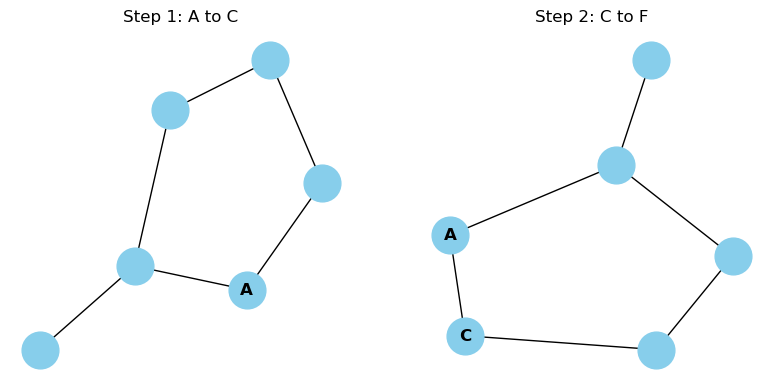

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to perform Depth-First Search (DFS)
def dfs(graph, start, goal):
    visited = set()  # Initialize set to store visited nodes
    stack = [(start, [start])]  # Initialize stack with starting node and its path
    
    while stack:
        current_station, path = stack.pop()  # Pop a station and its path from the stack
        
        if current_station == goal:
            print("Destination reached!")
            return path  # If destination station is reached, return the path
        
        if current_station not in visited:
            print(f"At Station: {current_station}, Path: {path}")  # Output current station and path
            visited.add(current_station)  # Mark current station as visited
            
            # Explore unvisited neighboring stations of current station
            for neighbor in graph[current_station]:
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))  # Push neighbor and its updated path to stack
    
    print("Destination is unreachable.")
    return None  # If destination station is unreachable, return None

# Create a subway system graph
subway_system = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Create a NetworkX graph from the subway system graph
G = nx.Graph(subway_system)

# Perform DFS to find a route from station 'A' to station 'F'
start_station = 'A'
destination_station = 'F'
print("DFS Traversal:")
route = dfs(subway_system, start_station, destination_station)

# Plot each step of the DFS traversal
plt.figure(figsize=(15, 10))
for i in range(len(route) - 1):
    plt.subplot(2, 3, i + 1)
    nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=20,
            pos=nx.spring_layout(G), labels={station: station if station in route[:i + 1] else '' for station in G.nodes()})
    plt.title(f"Step {i + 1}: {route[i]} to {route[i + 1]}")
plt.show()


# Applications of Depth-First Search (DFS)

Depth-First Search (DFS) is a fundamental graph traversal algorithm with various applications across different domains:

1. **Pathfinding and Graph Traversal**:
   - DFS is used for traversing or searching graphs, such as maze-solving, finding connected components, cycle detection, and topological sorting.

2. **Spanning Trees and Minimum Spanning Trees (MST)**:
   - DFS is employed to find spanning trees in graphs and is a key component in algorithms like Kruskal's and Prim's for finding minimum spanning trees.

3. **Network Analysis and Routing**:
   - DFS helps determine connectivity between nodes, find routes in networks (e.g., the internet or transportation systems), and optimize network paths.

4. **Social Network Analysis**:
   - DFS can be utilized to find paths between individuals, analyze communities, identify influencers, and perform recommendation systems in social networks.

5. **Puzzle Solving**:
   - DFS is commonly used in solving puzzles like Sudoku, word games, and chess problems. It explores possible states or configurations until a solution is found.

6. **Compiler Construction**:
   - In compiler design, DFS is used in parsing and code generation phases to traverse abstract syntax trees, symbol tables, and control flow graphs.

7. **Artificial Intelligence**:
   - DFS plays a significant role in search algorithms for problem-solving in artificial intelligence, including constraint satisfaction, game tree search, and planning.

8. **Web Crawling and Indexing**:
   - DFS is employed by web crawlers to traverse and index web pages on the internet. It follows hyperlinks recursively to discover and catalog web content.

9. **Database Systems**:
   - DFS can be used in database systems for query optimization, query processing, and indexing data structures.

10. **Robotics and Autonomous Vehicles**:
    - DFS aids in path planning for robots and autonomous vehicles to navigate environments efficiently and avoid obstacles.

These applications highlight the versatility and importance of DFS across various fields.


# What is Dijkastra's Algorithm ?

### Dijkstra’s algorithm tries to find the shortest path from the starting(root) node to every node, hence we can get the shortest path from the starting node to the goal. 

![GIF Example](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*3aibaGt1-zimnwreliwX0A.gif)

## Dijkstra's Algorithm

1. **Initialization:**
   - Mark the source node with a current distance of 0 and the rest with infinity.

2. **Set Current Node:**
   - Set the non-visited node with the smallest current distance as the current node.

3. **Update Distances:**
   - For each neighbor, N, of the current node:
     - Add the current distance of the adjacent node with the weight of the edge connecting the current node to N.
     - If it is smaller than the current distance of N, set it as the new current distance of N.

4. **Mark Current Node as Visited:**
   - Mark the current node as visited.

5. **Repeat:**
   - Go to step 2 if there are any nodes that are unvisited.

Initial Graph:


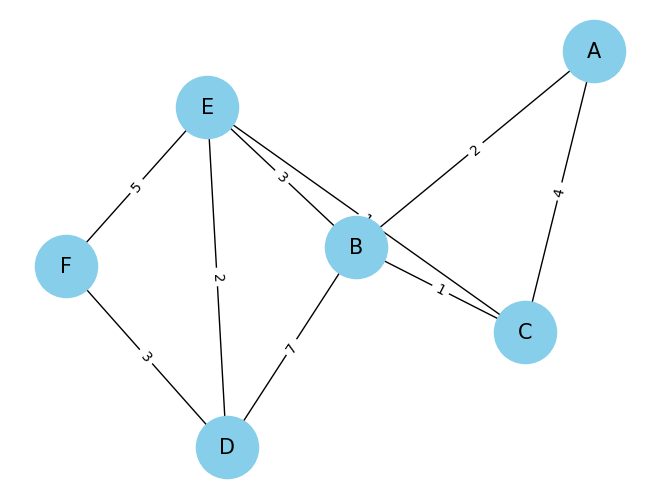

Enter the start node: D
Enter the end node: A

Initial Adjacency Matrix:
Adjacency Matrix:
   A  B  C  D  E  F
A 0.0 2.0 4.0 ∞ ∞ ∞
B 2.0 0.0 1.0 7.0 3.0 ∞
C 4.0 1.0 0.0 ∞ 1.0 ∞
D ∞ 7.0 ∞ 0.0 2.0 3.0
E ∞ 3.0 1.0 2.0 0.0 5.0
F ∞ ∞ ∞ 3.0 5.0 0.0

Shortest path from D to A: D -> E -> C -> B -> A with total distance 6.0


In [5]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def display_graph(graph):
    G = nx.Graph()
    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

def create_adjacency_matrix(graph):
    nodes = list(graph.keys())
    size = len(nodes)
    adj_matrix = np.full((size, size), np.inf)
    np.fill_diagonal(adj_matrix, 0)
    
    node_index = {node: index for index, node in enumerate(nodes)}
    
    for node, edges in graph.items():
        for neighbor, weight in edges.items():
            adj_matrix[node_index[node]][node_index[neighbor]] = weight
            
    return adj_matrix, node_index

def display_adjacency_matrix(matrix, nodes):
    print("Adjacency Matrix:")
    print("   " + "  ".join(nodes))
    for i, row in enumerate(matrix):
        print(nodes[i], " ".join(f"{val:.1f}" if val != np.inf else "∞" for val in row))

def dijkstra(graph, start, end):
    adj_matrix, node_index = create_adjacency_matrix(graph)
    nodes = list(graph.keys())
    
    print("\nInitial Adjacency Matrix:")
    display_adjacency_matrix(adj_matrix, nodes)
    
    priority_queue = [(0, start)]
    shortest_paths = {start: (None, 0)}
    
    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)
        
        if current_distance > shortest_paths[current_node][1]:
            continue
        
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if neighbor not in shortest_paths or distance < shortest_paths[neighbor][1]:
                shortest_paths[neighbor] = (current_node, distance)
                heapq.heappush(priority_queue, (distance, neighbor))
    
    path = []
    node = end
    while node is not None:
        path.append(node)
        node = shortest_paths[node][0]
    path.reverse()
    
    return path, shortest_paths[end][1]

# Example graph with 6 nodes
graph = {
    'A': {'B': 2, 'C': 4},
    'B': {'A': 2, 'C': 1, 'D': 7, 'E': 3},
    'C': {'A': 4, 'B': 1, 'E': 1},
    'D': {'B': 7, 'E': 2, 'F': 3},
    'E': {'B': 3, 'C': 1, 'D': 2, 'F': 5},
    'F': {'D': 3, 'E': 5}
}

# Display the graph
print("Initial Graph:")
display_graph(graph)

# Get user input for start and end points
start_node = input("Enter the start node: ").strip().upper()
end_node = input("Enter the end node: ").strip().upper()

# Check if the nodes are valid
if start_node not in graph or end_node not in graph:
    print("Invalid start or end node.")
else:
    # Perform Dijkstra's algorithm
    path, distance = dijkstra(graph, start_node, end_node)

    # Display the result
    print(f"\nShortest path from {start_node} to {end_node}: {' -> '.join(path)} with total distance {distance:.1f}")


### Applications of Dijkstra's Algorithm

1. **Shortest Path in Networks:** Dijkstra's algorithm is commonly used to find the shortest path between two nodes in a network, such as road networks, computer networks, and social networks.

2. **Routing Protocols:** In computer networks, Dijkstra's algorithm is used in routing protocols to determine the best path for data packets to travel from a source to a destination.

3. **GPS Navigation Systems:** Dijkstra's algorithm is employed in GPS navigation systems to calculate the shortest route between a user's current location and their desired destination.

4. **Traffic Management:** Traffic management systems utilize Dijkstra's algorithm to optimize traffic flow by identifying the most efficient routes for vehicles to follow.

5. **Robotics:** Dijkstra's algorithm is applied in robotics for path planning, allowing robots to navigate through environments while avoiding obstacles and reaching their goal efficiently.

6. **Telecommunications:** Dijkstra's algorithm is used in telecommunications networks to optimize the routing of data packets, ensuring efficient data transmission between network nodes.

7. **Resource Allocation:** Dijkstra's algorithm is utilized in resource allocation problems, such as allocating resources in supply chain management or scheduling tasks in project management, to minimize costs or maximize efficiency.

8. **Circuit Design:** In electronic circuit design, Dijkstra's algorithm is employed to find the shortest path between nodes in a circuit, helping optimize the layout and minimize signal delay.

9. **Airline Route Planning:** Airlines use Dijkstra's algorithm for route planning to determine the most efficient flight paths between airports, considering factors such as distance, airspace restrictions, and fuel consumption.

10. **Urban Planning:** Urban planners use Dijkstra's algorithm to optimize transportation networks within cities, helping to design efficient road systems and public transportation routes.


